<a href="https://colab.research.google.com/github/aaditie/ML1/blob/main/californiahousepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [56]:
data = pd.read_csv('housing.csv')

In [57]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The data.dropna(inplace=True) command is used in the pandas library in Python to remove missing data (NaN values) from a DataFrame. the inpace true part will now take the data drop the NAN values and save the resul in the data objext itself

In [59]:
data.dropna(inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


we will split the data the x part wil contain no target variable and the y part will contain only target vairable

In [61]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'] ,axis = 1)
y= data['median_house_value']

In [62]:
x_train ,x_test, y_train , y_test = train_test_split(x, y , test_size = 0.2)

In [63]:
train_data= x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

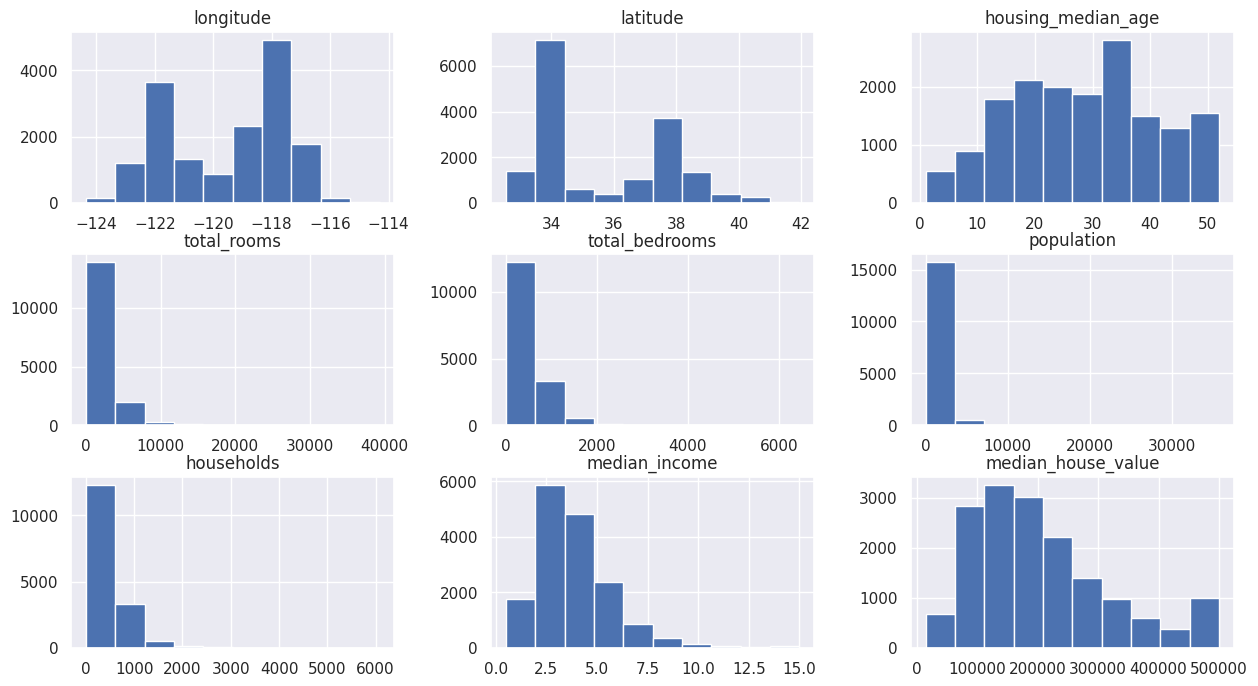

In [64]:
train_data.hist(figsize=(15,8))

In [65]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924463,-0.106127,0.050160,0.074384,0.103921,0.061534,-0.016615,-0.043854
latitude,-0.924463,1.000000,0.010689,-0.040614,-0.071400,-0.112731,-0.076400,-0.078913,-0.145978
housing_median_age,-0.106127,0.010689,1.000000,-0.360792,-0.320336,-0.296643,-0.303917,-0.117164,0.106061
total_rooms,0.050160,-0.040614,-0.360792,1.000000,0.931637,0.855197,0.919631,0.193545,0.132934
total_bedrooms,0.074384,-0.071400,-0.320336,0.931637,1.000000,0.874011,0.979372,-0.009710,0.050128
population,0.103921,-0.112731,-0.296643,0.855197,0.874011,1.000000,0.903901,0.003860,-0.023287
households,0.061534,-0.076400,-0.303917,0.919631,0.979372,0.903901,1.000000,0.011162,0.065440
median_income,-0.016615,-0.078913,-0.117164,0.193545,-0.009710,0.003860,0.011162,1.000000,0.688541
median_house_value,-0.043854,-0.145978,0.106061,0.132934,0.050128,-0.023287,0.065440,0.688541,1.000000


<Axes: >

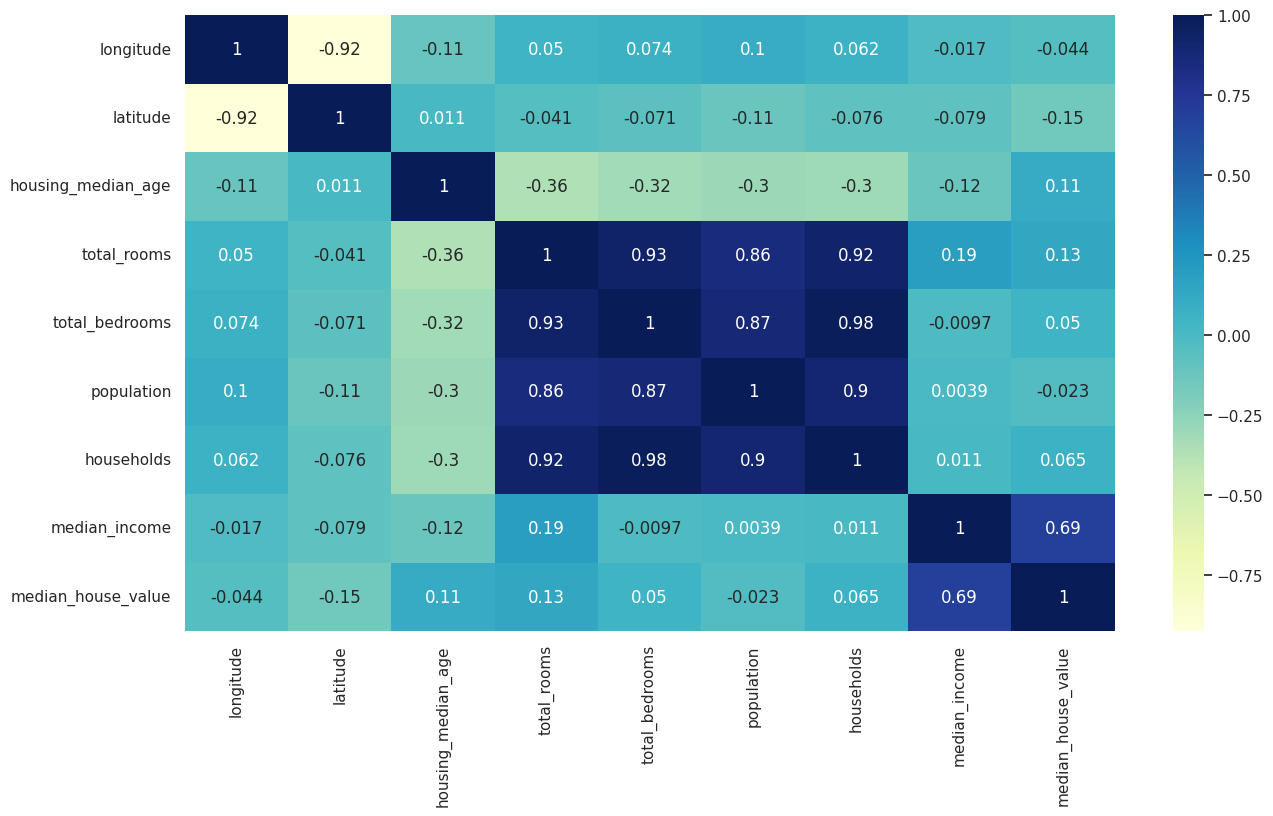

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap='YlGnBu')

The log transformation helps in normalizing right-skewed data, making it more normally distributed. This can improve the performance and convergence of algorithms.

In [67]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

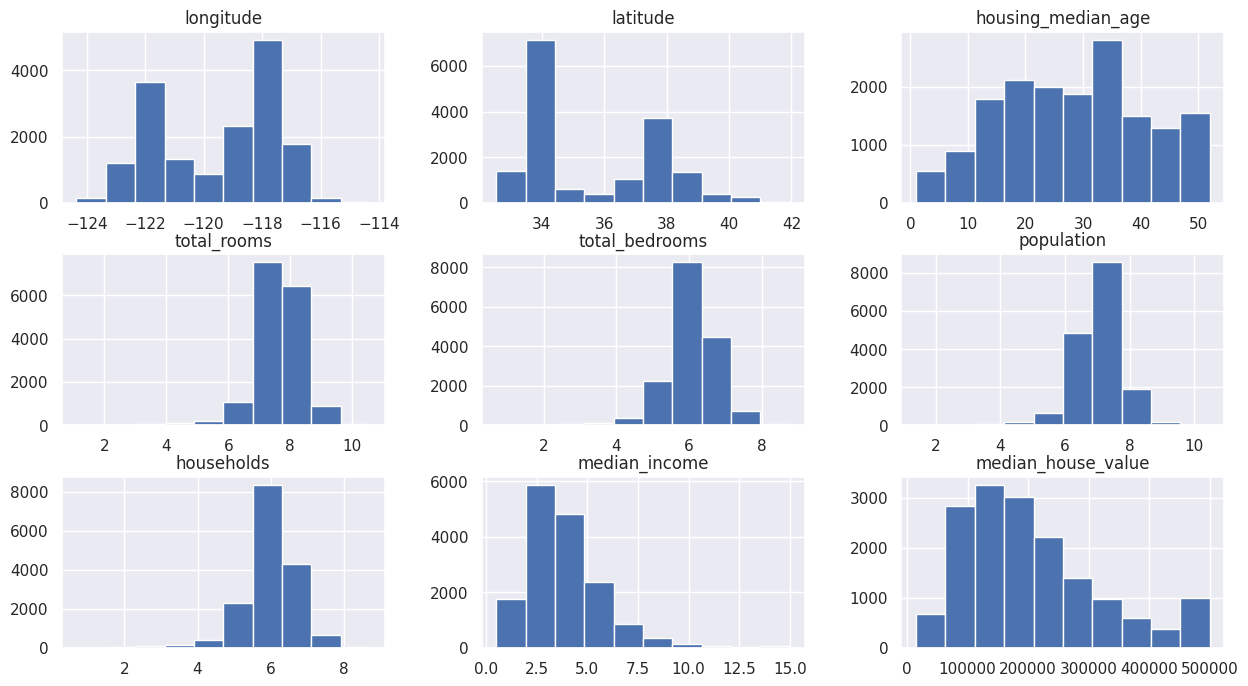

In [68]:
train_data.hist(figsize=(15,8))

In [69]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7251
INLAND        5197
NEAR OCEAN    2111
NEAR BAY      1783
ISLAND           4
Name: count, dtype: int64

In [70]:
dummies = pd.get_dummies(train_data.ocean_proximity)
dummies = dummies.astype(int)
print(dummies)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
8639           0       0       0         0           1
13256          0       1       0         0           0
18685          1       0       0         0           0
10218          1       0       0         0           0
3425           1       0       0         0           0
...          ...     ...     ...       ...         ...
8395           1       0       0         0           0
15460          0       0       0         0           1
1319           0       1       0         0           0
15242          0       0       0         0           1
17933          1       0       0         0           0

[16346 rows x 5 columns]


In [71]:
train_data= train_data.join(dummies).drop(['ocean_proximity'], axis = 1)

In [72]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8639,-118.43,33.87,41.0,6.742881,5.159055,5.843544,5.141664,6.8220,500001.0,0,0,0,0,1
13256,-117.65,34.12,27.0,7.740230,5.831882,6.977281,5.913503,6.5587,239000.0,0,1,0,0,0
18685,-121.83,37.02,22.0,7.551712,5.860786,6.634633,5.777652,2.9559,288400.0,1,0,0,0,0
10218,-117.88,33.89,18.0,7.388328,6.278521,6.765039,6.208590,3.6435,119100.0,1,0,0,0,0
3425,-118.43,34.28,30.0,7.233455,5.733341,7.628031,5.710427,3.0132,142600.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,-118.37,33.96,26.0,4.934474,3.178054,4.615121,3.044522,4.8750,175000.0,1,0,0,0,0
15460,-117.29,33.15,11.0,7.848153,6.100319,6.859615,6.107023,4.0625,87500.0,0,0,0,0,1
1319,-121.88,38.03,10.0,7.926603,6.429719,6.952729,6.152733,4.1111,158600.0,0,1,0,0,0
15242,-117.25,32.99,10.0,8.502486,6.620073,7.299121,6.453625,7.4720,439900.0,0,0,0,0,1


<Axes: >

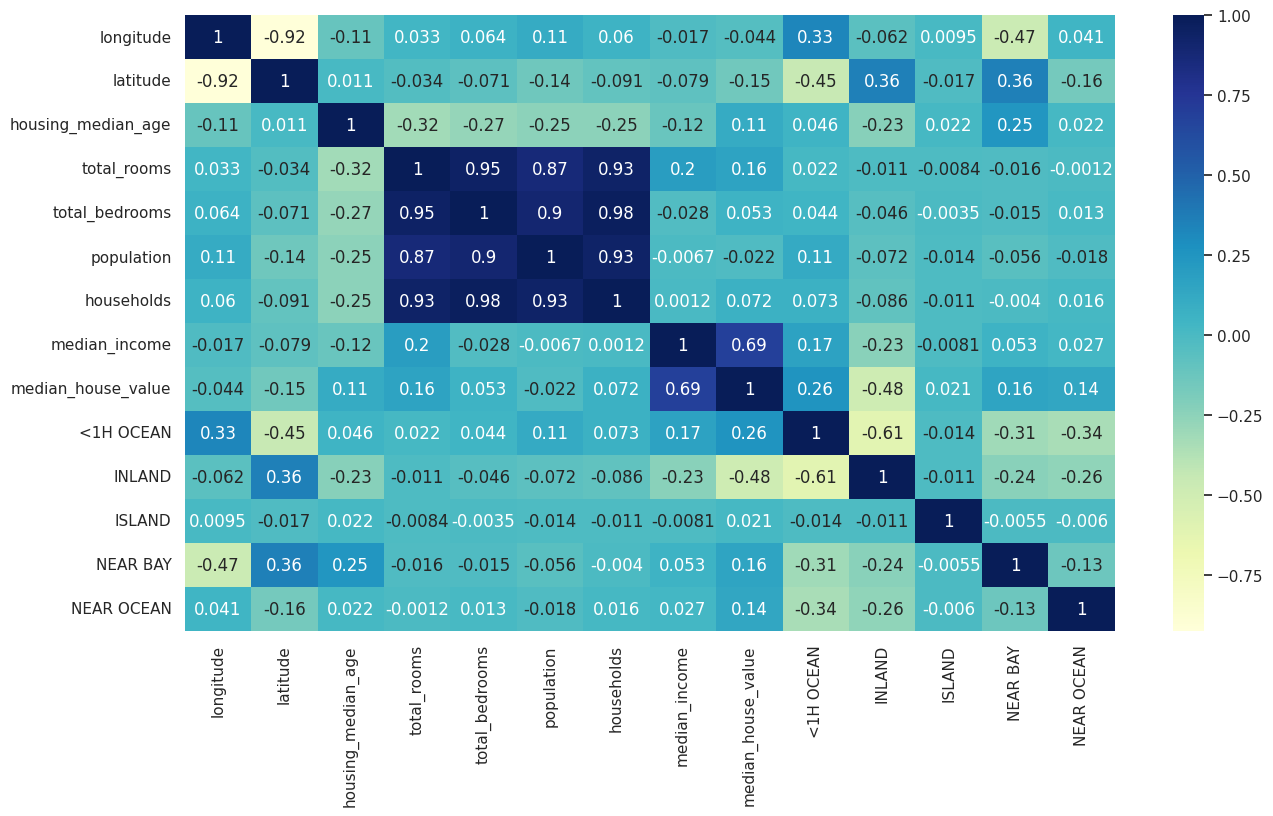

In [73]:
plt.figure(figsize= (15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True , cmap='YlGnBu')

<Axes: xlabel='longitude', ylabel='latitude'>

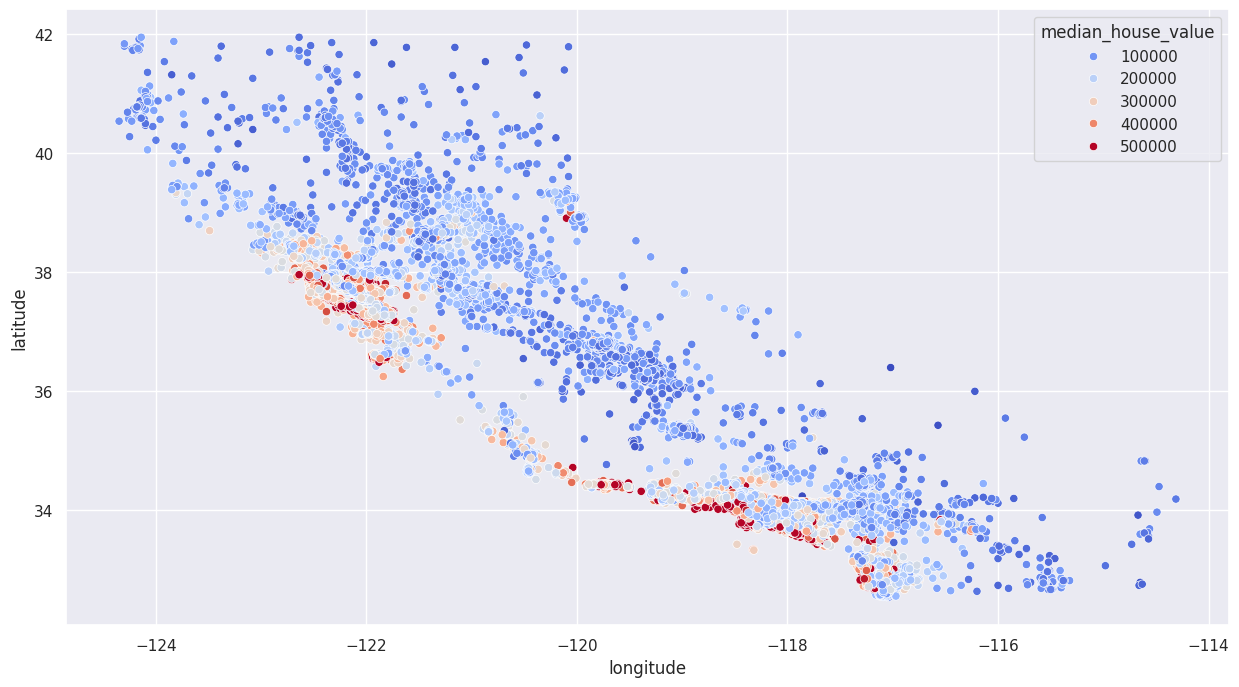

In [74]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude', y='latitude', data=train_data , hue='median_house_value',palette='coolwarm')

In [75]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']

<Axes: >

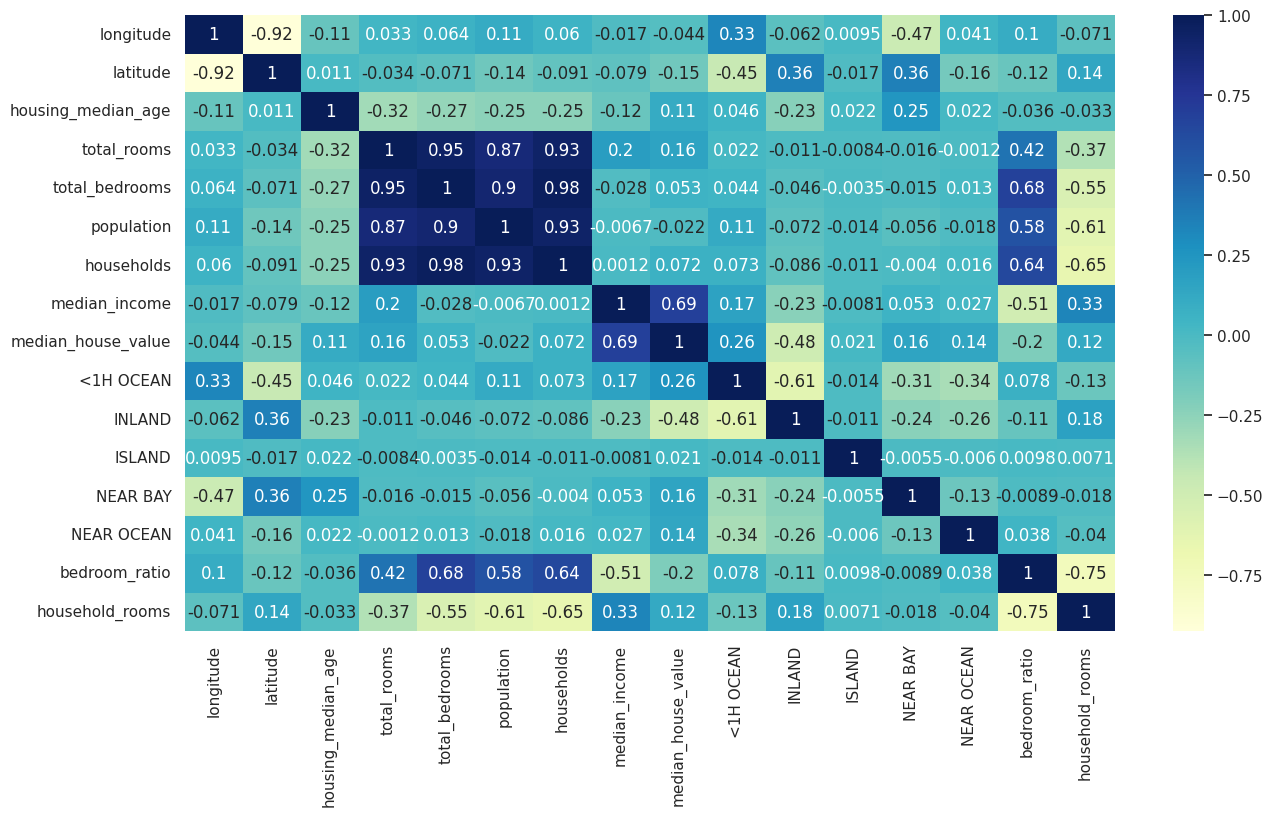

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) , annot=True, cmap='YlGnBu')

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train , y_train = train_data.drop(['median_house_value'], axis =1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
reg= LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [78]:
test_data= x_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)
dummies = pd.get_dummies(test_data.ocean_proximity)
dummies = dummies.astype(int)
print(dummies)
test_data= test_data.join(dummies).drop(['ocean_proximity'], axis = 1)
test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
17657          1       0       0         0           0
16717          1       0       0         0           0
4619           1       0       0         0           0
15202          1       0       0         0           0
939            0       0       0         1           0
...          ...     ...     ...       ...         ...
3357           0       1       0         0           0
20             0       0       0         1           0
11796          0       1       0         0           0
2361           0       1       0         0           0
2627           0       0       0         0           1

[4087 rows x 5 columns]


In [88]:
x_test , y_test = test_data.drop(['median_house_value'], axis =1), test_data['median_house_value']

In [80]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8639,-118.43,33.87,41.0,6.742881,5.159055,5.843544,5.141664,6.8220,500001.0,0,0,0,0,1,0.765111,1.311420
13256,-117.65,34.12,27.0,7.740230,5.831882,6.977281,5.913503,6.5587,239000.0,0,1,0,0,0,0.753451,1.308908
18685,-121.83,37.02,22.0,7.551712,5.860786,6.634633,5.777652,2.9559,288400.0,1,0,0,0,0,0.776087,1.307055
10218,-117.88,33.89,18.0,7.388328,6.278521,6.765039,6.208590,3.6435,119100.0,1,0,0,0,0,0.849789,1.190017
3425,-118.43,34.28,30.0,7.233455,5.733341,7.628031,5.710427,3.0132,142600.0,1,0,0,0,0,0.792614,1.266710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,-118.37,33.96,26.0,4.934474,3.178054,4.615121,3.044522,4.8750,175000.0,1,0,0,0,0,0.644051,1.620771
15460,-117.29,33.15,11.0,7.848153,6.100319,6.859615,6.107023,4.0625,87500.0,0,0,0,0,1,0.777294,1.285103
1319,-121.88,38.03,10.0,7.926603,6.429719,6.952729,6.152733,4.1111,158600.0,0,1,0,0,0,0.811157,1.288306
15242,-117.25,32.99,10.0,8.502486,6.620073,7.299121,6.453625,7.4720,439900.0,0,0,0,0,1,0.778604,1.317474


In [81]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17657,-121.89,37.28,35.0,7.791110,5.929589,6.896694,5.926926,6.0936,365400.0,1,0,0,0,0,0.761071,1.314528
16717,-120.66,35.50,19.0,7.529406,5.899897,6.947937,5.897154,3.3125,163900.0,1,0,0,0,0,0.783581,1.276787
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0,0.882690,1.142841
15202,-117.08,32.91,16.0,7.410952,5.433722,6.538140,5.416100,6.5853,248400.0,1,0,0,0,0,0.733202,1.368319
939,-122.04,37.53,34.0,7.748029,6.171701,7.329750,6.148468,3.7364,190400.0,0,0,0,1,0,0.796551,1.260156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,-120.65,40.42,39.0,8.083637,6.481577,7.291656,6.432940,2.1875,64300.0,0,1,0,0,0,0.801814,1.256601
20,-122.27,37.85,40.0,6.622736,5.220356,6.016157,5.117994,1.3578,147500.0,0,0,0,1,0,0.788248,1.294010
11796,-121.30,39.00,16.0,8.057061,6.295266,7.396949,6.293419,4.0282,126400.0,0,1,0,0,0,0.781335,1.280236
2361,-119.53,36.78,20.0,7.945555,6.173786,7.224753,6.122493,4.5625,136900.0,0,1,0,0,0,0.777011,1.297765


In [89]:
x_test_s= scaler.transform(x_test)

In [90]:
reg.score(x_test_s,y_test)

0.6716856243810396

In [96]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train , y_train)

RandomForestRegressor()

In [97]:
forest.score(x_test , y_test)

0.8155565879821071

hyperparameter tuning

In [108]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid={
    'n_estimators':[3,10,30],
    'max_features':[2,4,6,8]
}
grid_search = GridSearchCV(forest,param_grid , cv=5, scoring = 'neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [112]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [113]:
best_forest= grid_search.best_estimator_

In [114]:
best_forest.score(x_test,y_test)

0.817504796543049

In [133]:


new_data = {
    'longitude': [-122.23, -122.2],
    'latitude': [37.88,37.86],
    'housing_median_age': [41, 20],
    'ocean_proximity': ['NEAR BAY', 'INLAND'],
    'total_rooms': [880, 250],
    'total_bedrooms': [129, 110],
    'population': [322, 2100],
    'households': [126, 850],
    'median_income': [8.3252, 3.5]
}



In [134]:
new_df = pd.DataFrame(new_data)




In [135]:

new_df['total_rooms'] = np.log(new_df['total_rooms'] + 1)
new_df['total_bedrooms'] = np.log(new_df['total_bedrooms'] + 1)
new_df['population'] = np.log(new_df['population'] + 1)
new_df['households'] = np.log(new_df['households'] + 1)
new_df = pd.get_dummies(new_df, columns=['ocean_proximity'])



In [136]:

new_df = new_df.reindex(columns=x_train.columns, fill_value=0)



In [137]:

predictions = best_forest.predict(new_df)
print(predictions)

[421656.93333333 225613.33333333]
